Loading Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Loading dataset

In [ ]:
data = pd.read_csv('WISDM_.csv')
display(data)

,User_ID,Activity_Label,Timestamp,X,Y,Z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;
...,...,...,...,...,...,...
1063917,19,Jogging,130192481447000,-18.200000,3.260000,-3.17;
1063918,19,Jogging,130192521638000,-7.500000,-2.340000,-1.23;
1063919,19,Jogging,130192561555000,-6.210000,-6.090000,-2.64;
1063920,19,Jogging,130192641481000,1.180000,-5.180000,-4.18;


# Data Cleaning

Step 1: Check for missing values

In [ ]:
for col in data.columns:
    missing_val=data[col].isnull().sum()
    print(f"{col} : {missing_val}")

User_ID : 0
Activity_Label : 0
Timestamp : 0
X : 1
Y : 1
Z : 2


Drop rows with missing values

In [ ]:
data_cleaned = data.dropna(subset=['X','Y','Z'],how='any')
for col in data_cleaned.columns:
  missing_val=data_cleaned[col].isnull().sum()
  print(f"{col} : {missing_val}")
  print(data_cleaned[col].dtype)
  print()

User_ID : 0
int64

Activity_Label : 0
object

Timestamp : 0
int64

X : 0
float64

Y : 0
float64

Z : 0
object



Step 2: handling duplicates

In [ ]:
#check for duplicates
print("Number of duplicate rows: ",data_cleaned.duplicated().sum())
#drop duplicates
data_cleaned=data_cleaned.drop_duplicates()
print("After dropping")
print("Number of duplicate rows: ",data_cleaned.duplicated().sum())

Number of duplicate rows:  55360
After dropping
Number of duplicate rows:  0


In [ ]:
data_cleaned=data_cleaned.drop('User_ID',axis=1)

data_cleaned

,Activity_Label,Timestamp,X,Y,Z
0,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,Jogging,49106332290000,-1.184970,12.108489,7.205164;
...,...,...,...,...,...
1062587,Walking,130762191438000,-5.940000,9.380000,7.12;
1062588,Walking,130762231477000,-6.130000,7.250000,7.86;
1062589,Walking,130762271638000,-3.790000,5.860000,8.08;
1062590,Walking,130762311647000,-0.110000,7.550000,7.31;


In [ ]:
#convert object to numerical form
# Replace semicolons and convert to numeric
for col in data_cleaned.columns:
    if col != 'Activity_Label':
        # Convert the column to string type before applying string operations
        data_cleaned[col] = data_cleaned[col].astype(str).str.replace(';', '')
        data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')

Standardization


In [ ]:
scaler = StandardScaler()
# Apply fit_transform on the cleaned data (data_cleaned)
# Ensure all semicolons are replaced before converting to numeric
data_cleaned[['X', 'Y', 'Z']] = scaler.fit_transform(data_cleaned[['X', 'Y', 'Z']].astype(float))
data_cleaned


,Activity_Label,Timestamp,X,Y,Z
0,Jogging,49105962326000,-0.203505,0.787312,0.019959
1,Jogging,49106062271000,0.636865,0.574941,0.113753
2,Jogging,49106112167000,0.620820,0.517764,-0.102257
3,Jogging,49106222305000,-0.191471,1.659257,0.545774
4,Jogging,49106332290000,-0.275709,0.701547,1.418343
...,...,...,...,...,...
1062587,Walking,130762191438000,-0.975908,0.292479,1.400572
1062588,Walking,130762231477000,-1.003886,-0.026861,1.554992
1062589,Walking,130762271638000,-0.659311,-0.235256,1.600901
1062590,Walking,130762311647000,-0.117414,0.018116,1.440220


# EDA

Visualization

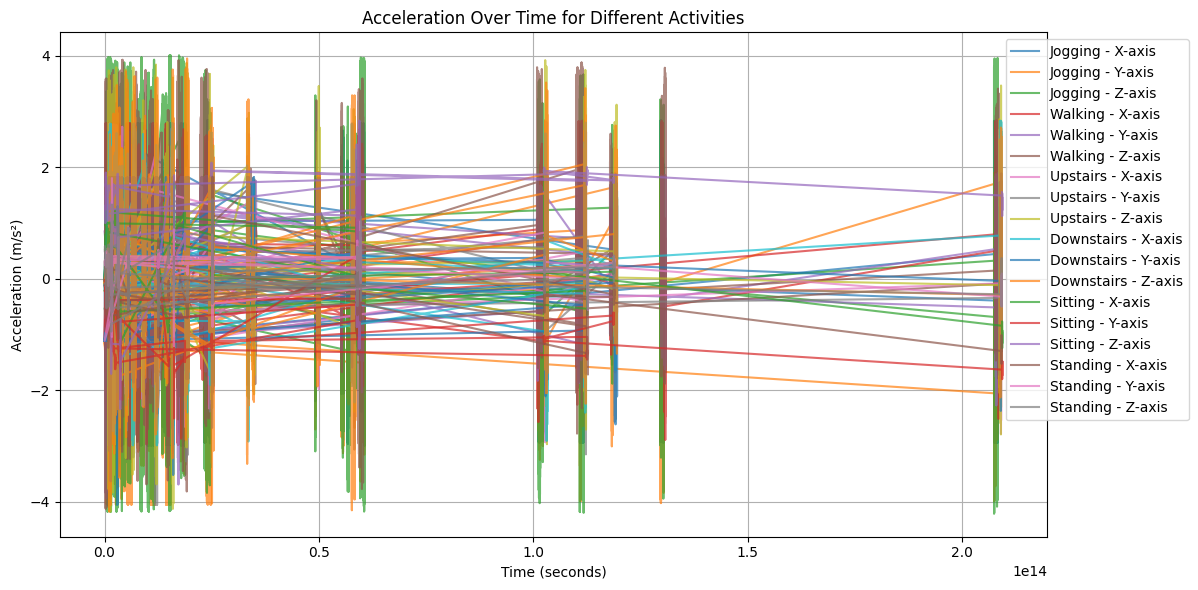

In [ ]:
import matplotlib.pyplot as plt

# Get unique activities
activities = data_cleaned['Activity_Label'].unique()

# Plot acceleration for each activity
plt.figure(figsize=(12, 6))

for activity in activities:
    # Filter data for the current activity
    activity_data = data_cleaned[data_cleaned['Activity_Label'] == activity].copy()  # Make a copy to avoid the warning

    # Add a 'Time' column using .loc
    activity_data.loc[:, 'Time'] = activity_data['Timestamp']

    # Plot X, Y, Z accelerations
    plt.plot(activity_data['Time'], activity_data['X'], label=f'{activity} - X-axis', alpha=0.7)
    plt.plot(activity_data['Time'], activity_data['Y'], label=f'{activity} - Y-axis', alpha=0.7)
    plt.plot(activity_data['Time'], activity_data['Z'], label=f'{activity} - Z-axis', alpha=0.7)

# Add plot labels and legend
plt.title('Acceleration Over Time for Different Activities')
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (m/s²)')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


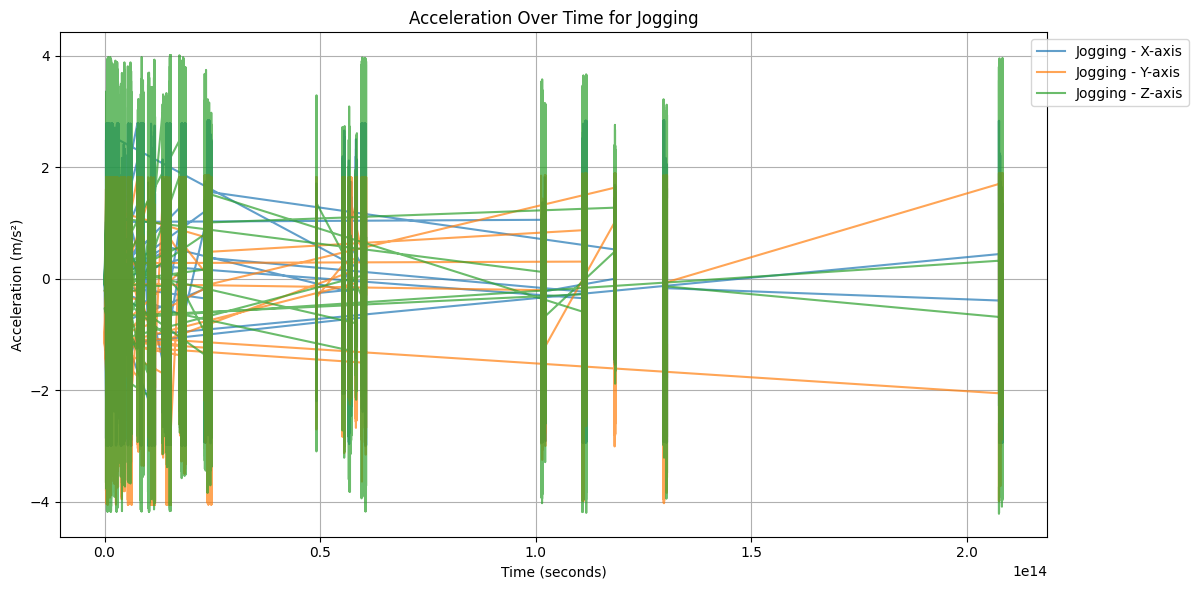

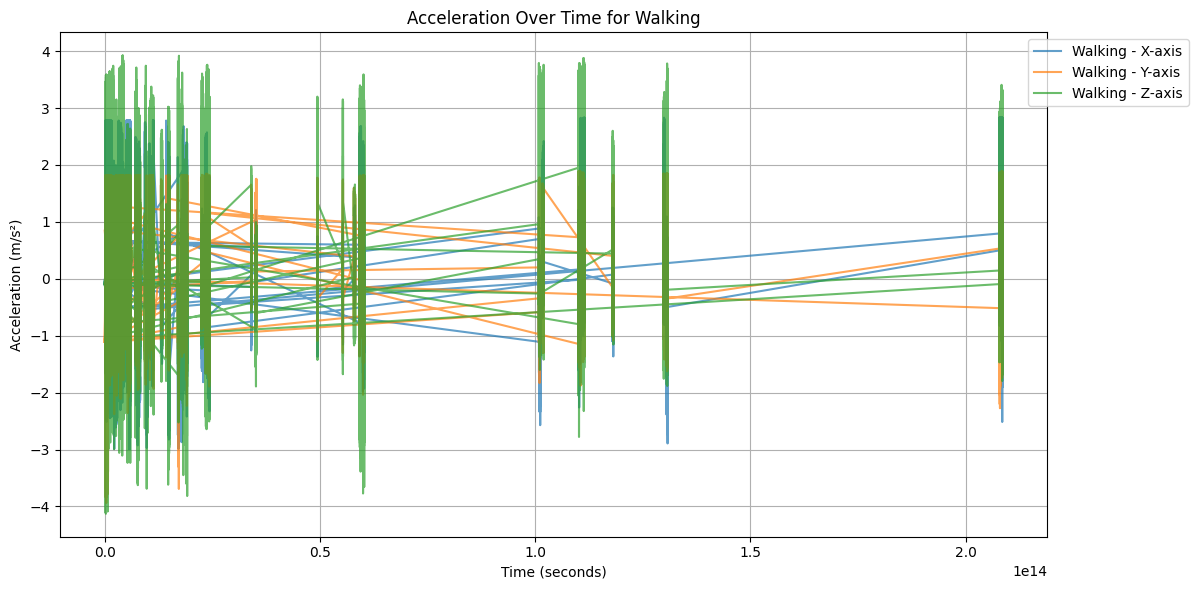

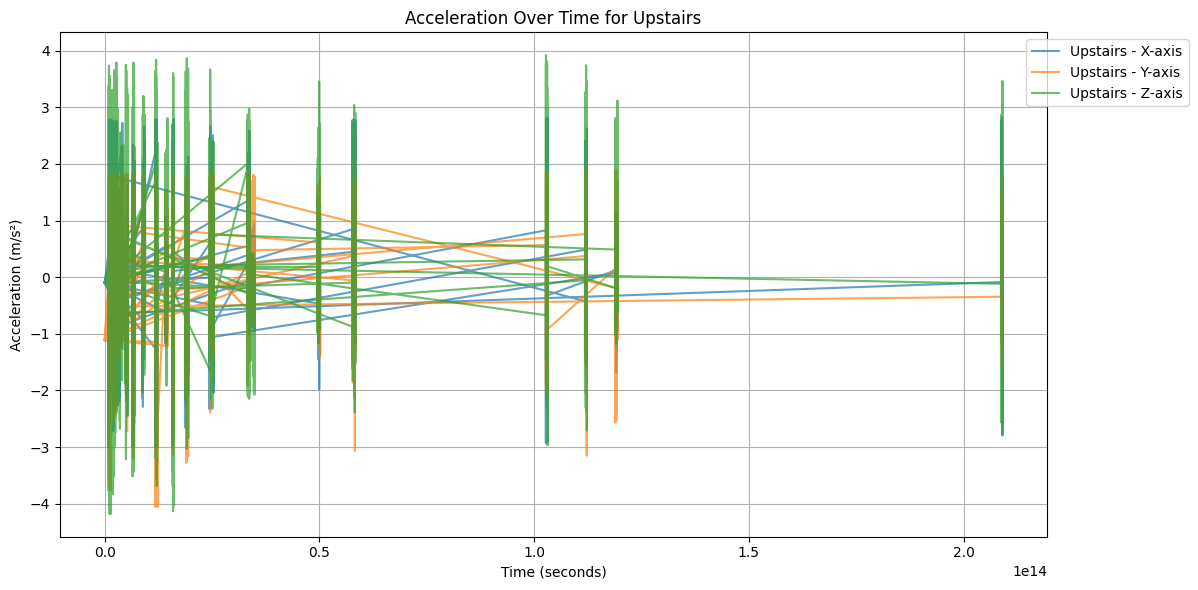

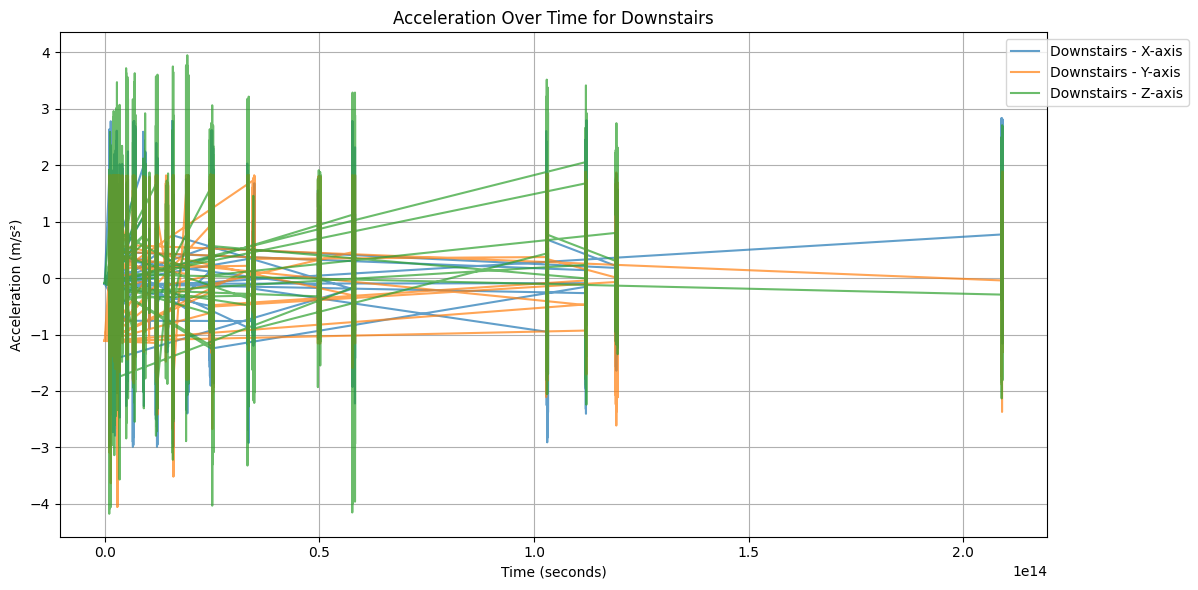

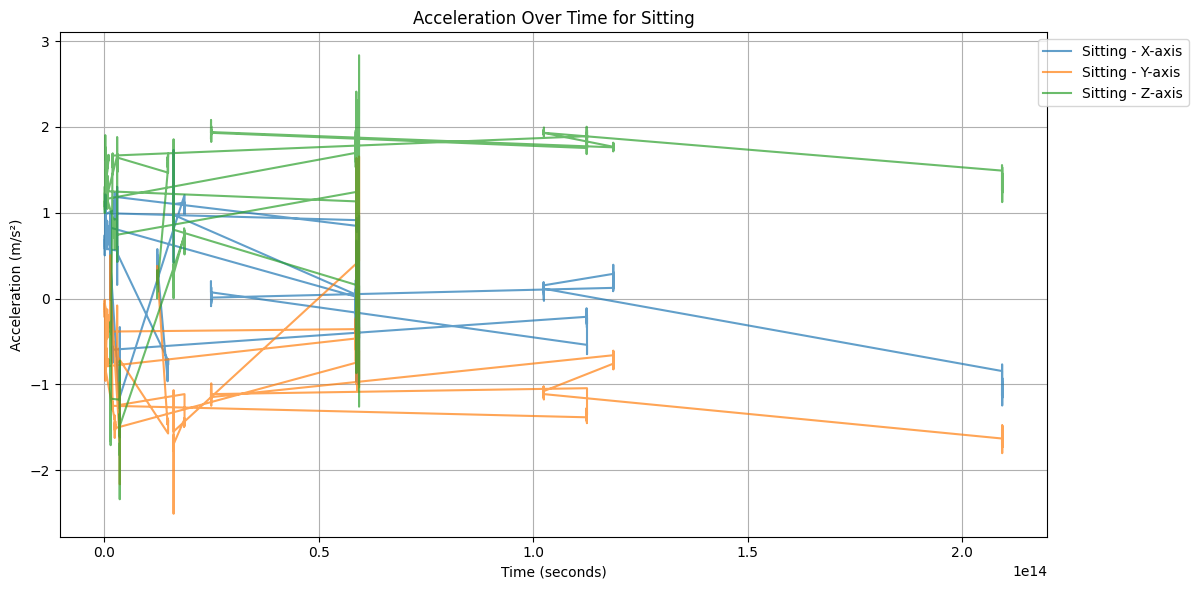

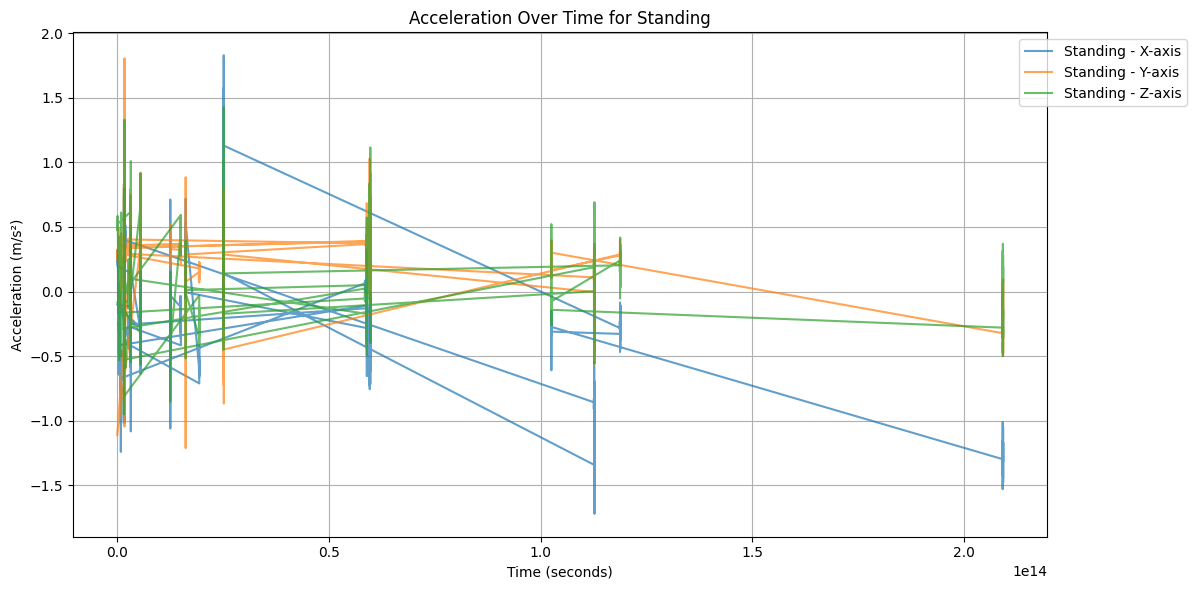

In [ ]:
import matplotlib.pyplot as plt

# Get unique activities
activities = data_cleaned['Activity_Label'].unique()

# Create a plot for each activity
for activity in activities:
    # Filter data for the current activity
    activity_data = data_cleaned[data_cleaned['Activity_Label'] == activity].copy()  # Ensure no warning

    # Add a 'Time' column using Timestamp (assuming it's in seconds)
    activity_data['Time'] = activity_data['Timestamp']  # Use Timestamp as time directly or convert if necessary

    # Create a new figure for each activity
    plt.figure(figsize=(12, 6))

    # Plot X, Y, Z accelerations
    plt.plot(activity_data['Time'], activity_data['X'], label=f'{activity} - X-axis', alpha=0.7)
    plt.plot(activity_data['Time'], activity_data['Y'], label=f'{activity} - Y-axis', alpha=0.7)
    plt.plot(activity_data['Time'], activity_data['Z'], label=f'{activity} - Z-axis', alpha=0.7)

    # Add plot labels and legend
    plt.title(f'Acceleration Over Time for {activity}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Acceleration (m/s²)')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.grid(True)
    plt.tight_layout()

    # Show the plot for this activity
    plt.show()


Statistics

In [ ]:
# Calculate the mean, median, and standard deviation for each activity
activity_stats = data_cleaned.groupby('Activity_Label')[['X', 'Y', 'Z']].agg(['mean', 'median', 'std'])

# Display the results
display(activity_stats)


X                             Y                      \
                    mean    median       std      mean    median       std   
Activity_Label                                                               
Downstairs     -0.045084 -0.095326  0.716886  0.188765  0.178536  0.721441   
Jogging        -0.134655 -0.135085  1.358849 -0.261141 -0.343971  1.398392   
Sitting         0.121579  0.085797  0.679949 -0.815479 -0.734506  0.492781   
Standing       -0.247732 -0.260251  0.470547  0.239120  0.305972  0.191876   
Upstairs       -0.023683 -0.073238  0.780074  0.125812  0.184533  0.721525   
Walking         0.128414  0.051928  0.849161  0.197523  0.207022  0.744520   

                       Z                      
                    mean    median       std  
Activity_Label                                
Downstairs      0.062168  0.025644  0.769376  
Jogging        -0.121390 -0.204149  1.249167  
Sitting         1.323452  1.625827  0.772793  
Standing        0.051464  0.065435  0.282698  
Upstairs       -0.015467 -0.062466  0.746603  
Walking        -0.107009 -0.196052  0.838502

Magnitude

In [ ]:

# Compute the magnitude of the acceleration vector
data_cleaned['Magnitude'] = np.sqrt(data_cleaned['X']**2 + data_cleaned['Y']**2 + data_cleaned['Z']**2)

# Display the first few rows to verify
display(data_cleaned)


,Activity_Label,Timestamp,X,Y,Z,Magnitude
0,Jogging,49105962326000,-0.203505,0.787312,0.019959,0.813433
1,Jogging,49106062271000,0.636865,0.574941,0.113753,0.865502
2,Jogging,49106112167000,0.620820,0.517764,-0.102257,0.814834
3,Jogging,49106222305000,-0.191471,1.659257,0.545774,1.757175
4,Jogging,49106332290000,-0.275709,0.701547,1.418343,1.606201
...,...,...,...,...,...,...
1062587,Walking,130762191438000,-0.975908,0.292479,1.400572,1.731918
1062588,Walking,130762231477000,-1.003886,-0.026861,1.554992,1.851083
1062589,Walking,130762271638000,-0.659311,-0.235256,1.600901,1.747261
1062590,Walking,130762311647000,-0.117414,0.018116,1.440220,1.445112


# Model 1

Best K: 20
Best Accuracy: 0.6267
Classification Report:
               precision    recall  f1-score   support

  Downstairs       0.29      0.08      0.12     19110
     Jogging       0.68      0.68      0.68     59080
     Sitting       0.97      0.98      0.98     11199
    Standing       0.79      0.90      0.84      8928
    Upstairs       0.30      0.08      0.13     22992
     Walking       0.58      0.80      0.67     80403

    accuracy                           0.63    201712
   macro avg       0.60      0.59      0.57    201712
weighted avg       0.58      0.63      0.58    201712



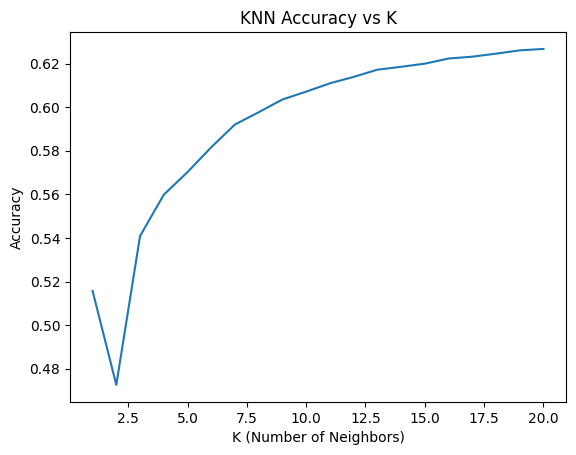

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Step 1: Prepare the data
# Ensure you have the 'Magnitude' and the target 'Activity_Label' columns

# Features (X, Y, Z accelerations) and target (Activity_Label)
X = data_cleaned[['X', 'Y', 'Z']]  # Features
y = data_cleaned['Activity_Label']  # Target variable (Activity Label)

# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the KNN model with different values of K
best_k = 1
best_accuracy = 0
best_model = None

# Experiment with different values of K (e.g., 1 to 20)
for k in range(1, 21):
    # Initialize the KNN classifier with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn.predict(X_test)

    # Calculate accuracy for this model
    accuracy = accuracy_score(y_test, y_pred)

    # If the current model is better, store it
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        best_model = knn

# Step 4: Evaluate the best model
print(f"Best K: {best_k}")
print(f"Best Accuracy: {best_accuracy:.4f}")

# Predictions using the best model
y_pred_best = best_model.predict(X_test)

# Step 5: Calculate evaluation metrics (precision, recall, accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# Optional: Visualize results (accuracy vs K)
import matplotlib.pyplot as plt

accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(range(1, 21), accuracies)
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs K')
plt.show()


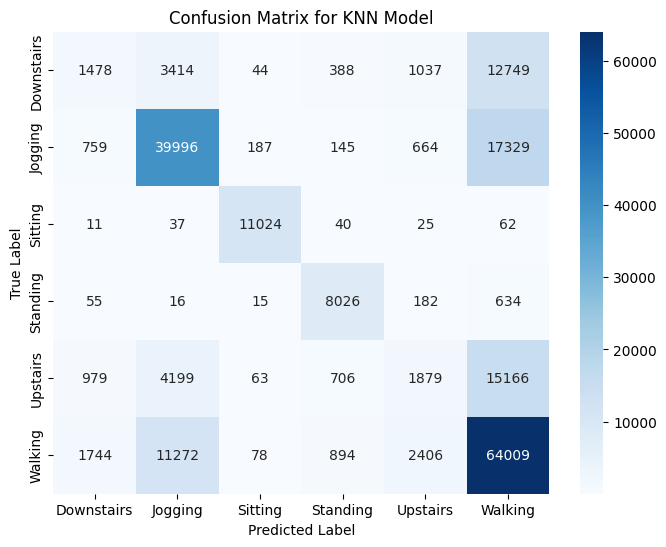

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Step 1: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Step 2: Plot the confusion matrix using seaborn heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for KNN Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# k means

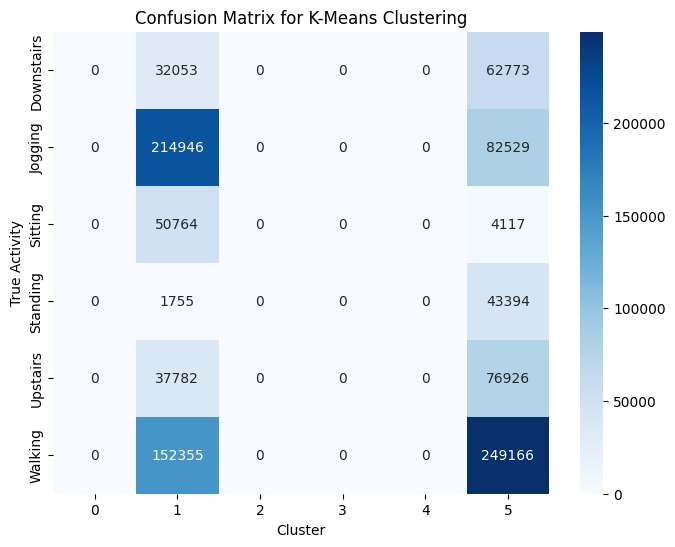

Cluster centroids (X, Y, Z accelerations):
 [[-0.1277498  -0.04825319  1.65500536]
 [ 1.24860967 -0.98754063  0.00617005]
 [ 1.11829077  0.92154912 -0.27849858]
 [-0.86240376 -1.42759028 -0.69621478]
 [-0.09644299  0.11191969 -0.10690191]
 [-1.10596461  1.04717962 -0.66721837]]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Prepare Data for Clustering
X_clustering = data_cleaned[['X', 'Y', 'Z']]  # Using only X, Y, Z for clustering

# Step 2: Apply K-Means Clustering
# Set K to the number of unique activities
K = len(data_cleaned['Activity_Label'].unique())  # Number of unique activities

# Initialize the KMeans model
kmeans = KMeans(n_clusters=K, random_state=42)

# Fit the KMeans model
data_cleaned['Cluster'] = kmeans.fit_predict(X_clustering)

# Step 3: Compare Clusters to True Labels
# Step 3: Compare Clusters to True Labels
# Create a mapping from cluster labels to activity labels
cluster_labels = pd.DataFrame({'Cluster': kmeans.labels_, 'Activity_Label': data_cleaned['Activity_Label']})
# Get the most frequent activity label for each cluster
mapping = cluster_labels.groupby('Cluster')['Activity_Label'].apply(lambda x: x.mode()[0]).to_dict()

# Map cluster labels to activity labels
predicted_labels = data_cleaned['Cluster'].map(mapping)

# Create a confusion matrix using the mapped labels
cm = confusion_matrix(data_cleaned['Activity_Label'], predicted_labels)
# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(data_cleaned['Cluster']),
            yticklabels=np.unique(data_cleaned['Activity_Label']))
plt.title('Confusion Matrix for K-Means Clustering')
plt.xlabel('Cluster')
plt.ylabel('True Activity')
plt.show()

# Step 4: Analyze Clustering Results
# Print the centroids of the clusters to understand the grouping
print("Cluster centroids (X, Y, Z accelerations):\n", kmeans.cluster_centers_)
